In [5]:
from transformers import AutoModelForCausalLM
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import safe as sf
import datamol as dm
from safe.tokenizer import SAFETokenizer

# Load the trained model and tokenizer
checkpoint_path = ".saved_model/phi1_5-safmol_0528/checkpoint-29600"
model = AutoModelForCausalLM.from_pretrained(checkpoint_path)
# Set the model to evaluation mode
model.eval()


/home/thomas/anaconda3/envs/safemol/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(1880, 2048)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-23): 24 x PhiDecoderLayer(
        (self_attn): PhiSdpaAttention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=2048, out_features=2048, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.1, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=2048, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=2048, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
          )
          (k_proj): lora.Linear(
            (base_layer): Linear(in_features=2048, out_features=2048, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropo

# Let's make some Molecules!

In [6]:
tokenizer = SAFETokenizer().load(checkpoint_path+"/tokenizer.json")

designer = sf.SAFEDesign(model=model,tokenizer=tokenizer)
generated_smiles = designer.de_novo_generation(sanitize=True, n_samples_per_trial=100)

  0%|          | 0/1 [00:00<?, ?it/s]/home/thomas/anaconda3/envs/safemol/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


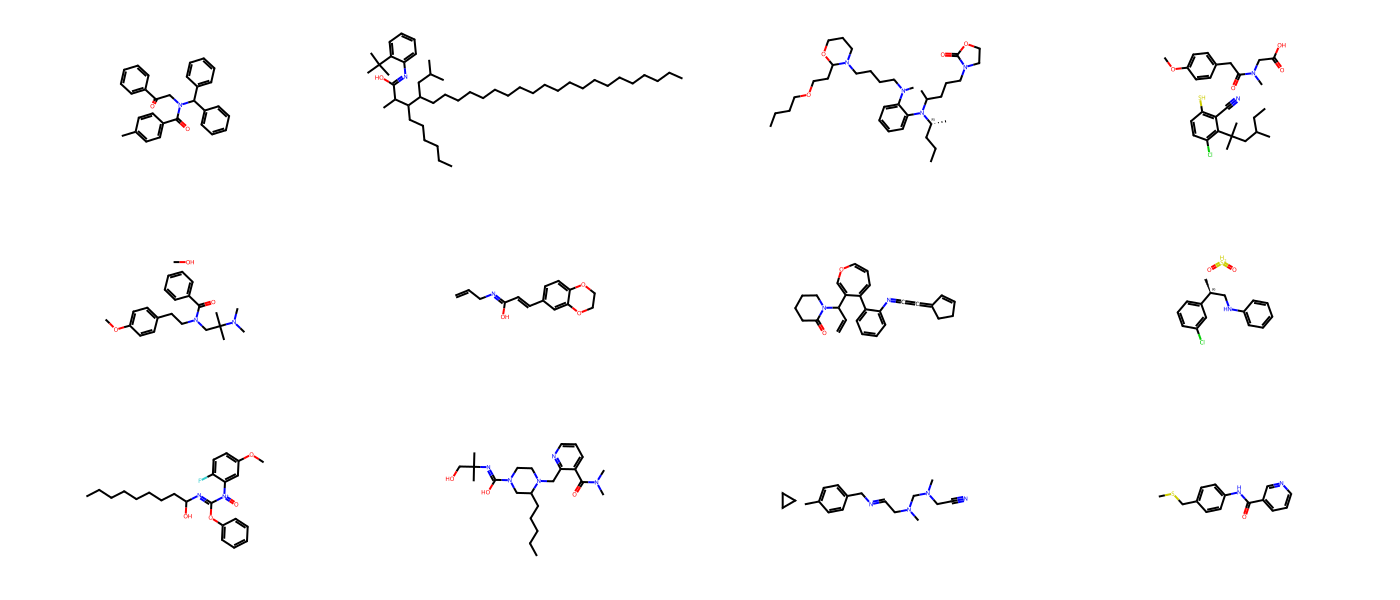

In [ ]:
dm.to_image(generated_smiles[:12], mol_size=(350, 200))


In [ ]:
generated_smiles[:10]

['CCCC(C)C(CN=CN1CCOCC1C(=O)O)C(C)N',
 'CCc1ccccc1C(=O)C1=CC=C=N1',
 'COC=O.C[C@H]1N=C(O)[CH]N1c1ccc(C(F)(F)F)cc1',
 'CN1c2ccccc2C#Cc2c1ccc(F)c2C(F)(C#CNCCC(F)(F)F)CO.FC(F)(F)C(F)(F)F',
 'CCc1ccc(C(O)=C(F)F)cc1',
 'CCCCCCCNCC1CCCNC(=O)C1.CN(CCCN)S(=O)(=O)c1ccccc1',
 'CCCCCc1ccc(OCCC(C)CO)cc1',
 'COc1cc(COCOC(C)(C)C(C)(C)O)ccc1-c1ccccc1C(C)(C)C',
 'O=C(O)NC1CCNC(C2CC2)C1NOC(C(=O)O)N1CCCC1',
 'O=C1CCCCN1Cc1ccccc1']

In [ ]:
import pandas as pd
train =  pd.read_csv("./data/train.csv")['SMILES'].values
test =  pd.read_csv("./data/test.csv")['SMILES'].values

In [ ]:
import moses
metrics = moses.get_all_metrics(gen=generated_smiles, train=train, test=test)

NameError: name 'generated_smiles' is not defined